<a href="https://colab.research.google.com/github/Nisha40108/ParkNaviGo/blob/main/Class_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
!pip install tensorflow==2.12

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import zipfile
import io
import os
import shutil
import pathlib
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from io import BytesIO
from zipfile import ZipFile

In [81]:
import shutil
import os

zip_file_path = '/content/sample_data/parking_data/Trial.zip'
extracted_folder_path = '/content/sample_data/parking_data'

# Unzip the file
shutil.unpack_archive(zip_file_path, extracted_folder_path, 'zip')

In [78]:
import os, shutil, pathlib

original_dir = pathlib.Path("/content/sample_data/Image/empty")
new_base_dir = pathlib.Path("/content/sample_data")

def make_subset(subset_name, start_index, end_index):
    for category in ("empty", "occupied"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok = True)
        fnames = [f"{category} {i}.png" for i in range(start_index + 1, min(end_index + 1,150))]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

# 70% for training
make_subset("train_data_1", start_index =0, end_index= 49)

# 15% for validation
make_subset("validation_data_1", start_index=50, end_index=74)

# 15% for testing
make_subset("test_data_1", start_index=74, end_index=99)

In [79]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train_data_1",
    image_size=(224, 224),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation_data_1",
    image_size=(224, 224),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test_data_1",
    image_size=(224, 224),
    batch_size=32)

Found 102 files belonging to 2 classes.
Found 52 files belonging to 2 classes.
Found 150 files belonging to 2 classes.


In [101]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 224, 224, 3)
labels batch shape: (32,)


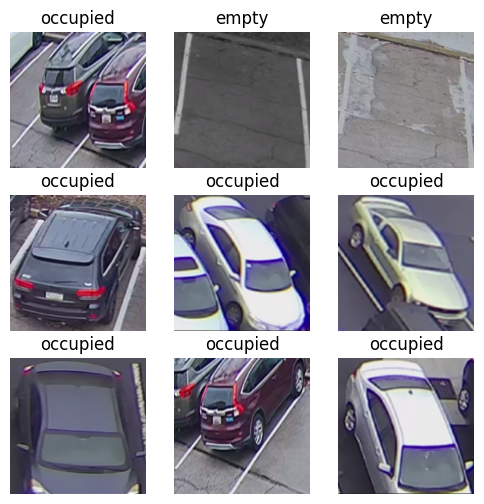

In [108]:
class_names = train_dataset.class_names

plt.figure(figsize=(6, 6))
for images, labels in train_dataset.take(1):  # Take one batch
    for i in range(9):  # Display the first 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [90]:
#Building the model
#Instantiating a small convnet for dogs vs. cats classification
#*Model - 1 MaxPooling Operation with Increase in filters from 32 to 256 in 5 Input Layers*

inputs = keras.Input(shape=(224, 224, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)


model = keras.Model(inputs=inputs, outputs=outputs)

In [86]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [97]:
# Compilimg the results of the model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])


# Saving the results of the model
callbacks = ModelCheckpoint(
            filepath= "model1.keras",
            save_best_only= True,
            monitor= "val_loss"
            )


# Fitting/Running the Model
Model_1 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks)

Epoch 1/50
4/4 [==============================] - 3s 134ms/step - loss: 0.9275 - accuracy: 0.8922 - val_loss: 0.3133 - val_accuracy: 0.9423
Epoch 2/50
4/4 [==============================] - 0s 66ms/step - loss: 0.1645 - accuracy: 0.9804 - val_loss: 0.5600 - val_accuracy: 0.8846
Epoch 3/50
4/4 [==============================] - 0s 60ms/step - loss: 0.5493 - accuracy: 0.9020 - val_loss: 0.4890 - val_accuracy: 0.8462
Epoch 4/50
4/4 [==============================] - 0s 60ms/step - loss: 0.2617 - accuracy: 0.9118 - val_loss: 0.3234 - val_accuracy: 0.9231
Epoch 5/50
4/4 [==============================] - 0s 76ms/step - loss: 0.1836 - accuracy: 0.9706 - val_loss: 0.2567 - val_accuracy: 0.9423
Epoch 6/50
4/4 [==============================] - 0s 76ms/step - loss: 0.1368 - accuracy: 0.9706 - val_loss: 0.2013 - val_accuracy: 0.9808
Epoch 7/50
4/4 [==============================] - 0s 75ms/step - loss: 0.0937 - accuracy: 0.9804 - val_loss: 0.1732 - val_accuracy: 0.9808
Epoch 8/50
4/4 [==========

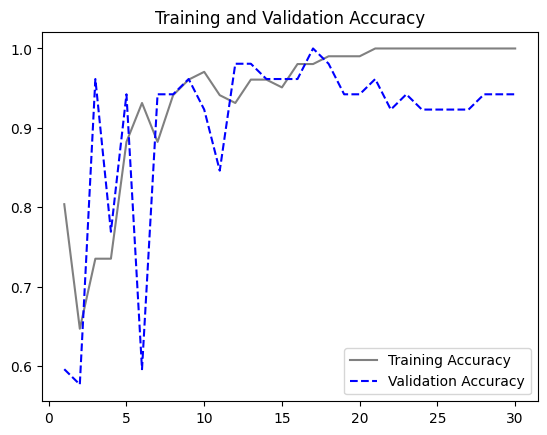

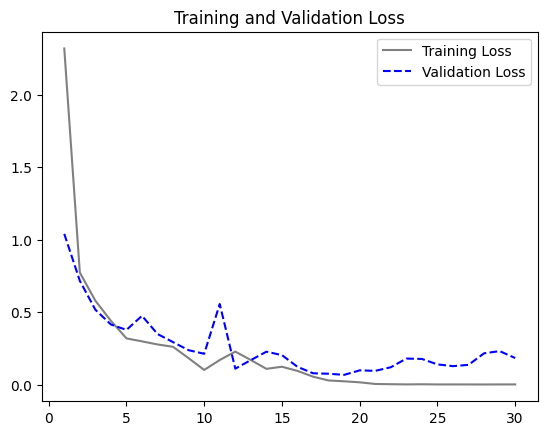

In [96]:
accuracy = Model_1.history["accuracy"]
val_accuracy = Model_1.history["val_accuracy"]

loss = Model_1.history["loss"]
val_loss = Model_1.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [94]:
test_model = keras.models.load_model("model1.keras")
Model1_Results = test_model.evaluate(test_dataset)
print(f'Loss: {Model1_Results[0]:.3f}')
print(f'Accuracy: {Model1_Results[1]:.3f}')

5/5 [==============================] - 1s 103ms/step - loss: 0.4272 - accuracy: 0.8400
Loss: 0.427
Accuracy: 0.840
